In [1]:
# Import the dataset loading function from sklearn
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
house_dataset = fetch_california_housing()

# Display the oringal data
house_dataset.keys()

# Import pandas package to format the data
import pandas as pd

# Extract features with their names into the a dataframe format
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)

# Extract target with their names into a pd.Series object with name MEDV
target = pd.Series(house_dataset.target, name="MEDV")

# Visualize the first 5 samples of the data
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [3]:
train_data.shape, test_data.shape

((16512, 8), (4128, 8))

In [4]:
def norm(x, mean, std):
    return (x - mean) / std


mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

normed_train_data = norm(train_data, mean, std)
normed_test_data = norm(test_data, mean, std)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=[8]),
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ]
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
import tensorflow as tf
optimizer = tf.keras.optimizers.RMSprop(0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])

In [9]:
model.fit(normed_train_data, train_targets, epochs=300, batch_size=1024, verbose=1)

Epoch 1/300
17/17 [==============================] - 1s 6ms/step - loss: 1.3207 - mae: 0.7960 - mse: 1.3207
Epoch 2/300
17/17 [==============================] - 0s 4ms/step - loss: 0.6400 - mae: 0.5787 - mse: 0.6400
Epoch 3/300
17/17 [==============================] - 0s 4ms/step - loss: 0.5623 - mae: 0.5425 - mse: 0.5623
Epoch 4/300
17/17 [==============================] - 0s 8ms/step - loss: 0.5054 - mae: 0.5092 - mse: 0.5054
Epoch 5/300
17/17 [==============================] - 0s 8ms/step - loss: 0.4987 - mae: 0.5106 - mse: 0.4987
Epoch 6/300
17/17 [==============================] - 0s 9ms/step - loss: 0.4527 - mae: 0.4828 - mse: 0.4527
Epoch 7/300
17/17 [==============================] - 0s 7ms/step - loss: 0.4497 - mae: 0.4779 - mse: 0.4497
Epoch 8/300
17/17 [==============================] - 0s 8ms/step - loss: 0.4190 - mae: 0.4593 - mse: 0.4190
Epoch 9/300
17/17 [==============================] - 0s 8ms/step - loss: 0.3945 - mae: 0.4459 - mse: 0.3945
Epoch 10/300
17/17 [========

In [10]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=0)
mse

0.3384477198123932

In [11]:
def build_model():
    model = keras.Sequential(
        [
            layers.Dense(
                64, activation="relu", input_shape=[normed_train_data.shape[1]]
            ),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )
    optimizer = tf.keras.optimizers.RMSprop(0.01)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])
    return model


model = build_model()

EPOCHS = 500
history = model.fit(
    normed_train_data,
    train_targets,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=1024,
    verbose=1,
)

Epoch 1/500
13/13 [==============================] - 2s 46ms/step - loss: 1.6014 - mae: 0.8514 - mse: 1.6014 - val_loss: 0.7432 - val_mae: 0.6346 - val_mse: 0.7432
Epoch 2/500
13/13 [==============================] - 0s 31ms/step - loss: 0.6757 - mae: 0.5855 - mse: 0.6757 - val_loss: 0.7297 - val_mae: 0.6025 - val_mse: 0.7297
Epoch 3/500
13/13 [==============================] - 0s 22ms/step - loss: 0.5760 - mae: 0.5470 - mse: 0.5760 - val_loss: 0.5015 - val_mae: 0.5317 - val_mse: 0.5015
Epoch 4/500
13/13 [==============================] - 0s 28ms/step - loss: 0.5147 - mae: 0.5196 - mse: 0.5147 - val_loss: 0.7117 - val_mae: 0.5967 - val_mse: 0.7117
Epoch 5/500
13/13 [==============================] - 0s 22ms/step - loss: 0.4930 - mae: 0.5029 - mse: 0.4930 - val_loss: 0.4469 - val_mae: 0.4923 - val_mse: 0.4469
Epoch 6/500
13/13 [==============================] - 0s 16ms/step - loss: 0.4875 - mae: 0.5027 - mse: 0.4875 - val_loss: 0.4471 - val_mae: 0.4664 - val_mse: 0.4471
Epoch 7/500
13/1

In [12]:
import pandas as pd

hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.163265,0.286560,0.163265,0.318088,0.369410,0.318088,495
496,0.165078,0.286804,0.165078,0.311646,0.379102,0.311646,496
497,0.165692,0.289072,0.165692,0.320056,0.373444,0.320056,497
498,0.170916,0.293477,0.170916,0.317006,0.369480,0.317006,498
499,0.155595,0.277797,0.155595,0.331138,0.381540,0.331138,499


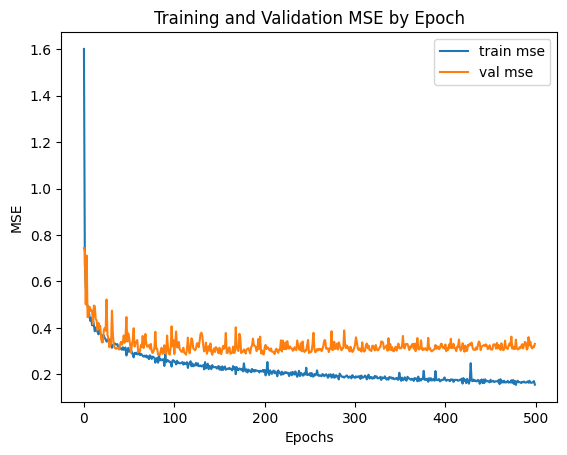

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist["epoch"], hist["mse"], label="train mse")
plt.plot(hist["epoch"], hist["val_mse"], label="val mse")
plt.xlabel("Epochs")
plt.ylabel("MSE")
# Set a title of the current axes.
plt.title("Training and Validation MSE by Epoch")
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [14]:
import numpy as np


def smooth_curve(values, std=5):
    # gaussian smoothing: Smooths a list of values by convolving with a gussian.
    width = std * 4
    x = np.linspace(-width, width, 2 * width + 1)
    kernel = np.exp(-((x / 5) ** 2))

    values = np.array(values)
    weights = np.ones_like(values)

    smoothed_values = np.convolve(values, kernel, mode="same")
    smoothed_weights = np.convolve(weights, kernel, mode="same")

    return smoothed_values / smoothed_weights

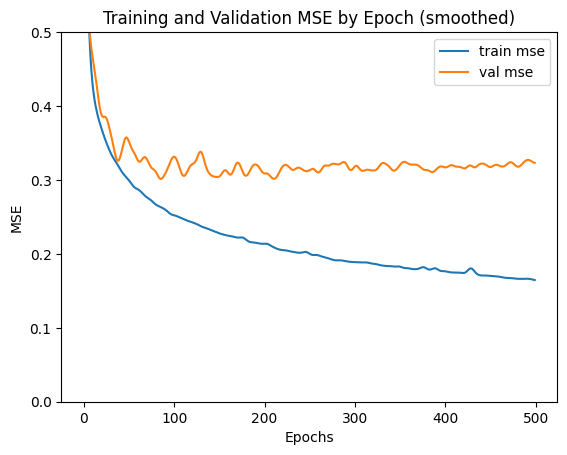

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist["epoch"], smooth_curve(hist["mse"]), label="train mse")
plt.plot(hist["epoch"], smooth_curve(hist["val_mse"]), label="val mse")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim((0, 0.5))
# Set a title of the current axes.
plt.title("Training and Validation MSE by Epoch (smoothed)")
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [16]:
model = build_model()
model.fit(normed_train_data, train_targets, epochs=150, batch_size=1024, verbose=1)

Epoch 1/150
17/17 [==============================] - 1s 7ms/step - loss: 1.3133 - mae: 0.7943 - mse: 1.3133
Epoch 2/150
17/17 [==============================] - 0s 8ms/step - loss: 0.6496 - mae: 0.5860 - mse: 0.6496
Epoch 3/150
17/17 [==============================] - 0s 7ms/step - loss: 0.5222 - mae: 0.5256 - mse: 0.5222
Epoch 4/150
17/17 [==============================] - 0s 8ms/step - loss: 0.5102 - mae: 0.5106 - mse: 0.5102
Epoch 5/150
17/17 [==============================] - 0s 7ms/step - loss: 0.4595 - mae: 0.4873 - mse: 0.4595
Epoch 6/150
17/17 [==============================] - 0s 7ms/step - loss: 0.4663 - mae: 0.4939 - mse: 0.4663
Epoch 7/150
17/17 [==============================] - 0s 6ms/step - loss: 0.4384 - mae: 0.4754 - mse: 0.4384
Epoch 8/150
17/17 [==============================] - 0s 6ms/step - loss: 0.4343 - mae: 0.4678 - mse: 0.4343
Epoch 9/150
17/17 [==============================] - 0s 8ms/step - loss: 0.4129 - mae: 0.4594 - mse: 0.4129
Epoch 10/150
17/17 [========

In [17]:
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=0)
mse

0.36390069127082825

129/129 [==============================] - 0s 1ms/step


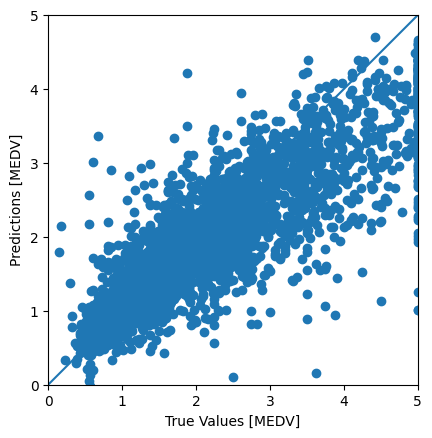

In [18]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect="equal")
plt.scatter(test_targets, test_predictions)
plt.xlabel("True Values [MEDV]")
plt.ylabel("Predictions [MEDV]")
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [19]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [20]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
len(train_labels), len(test_labels)

(60000, 10000)

In [22]:
train_labels, test_labels

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

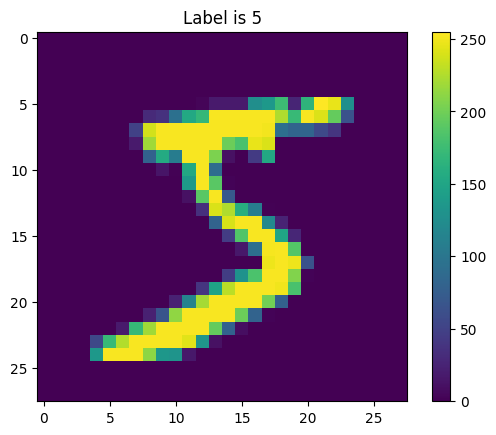

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])  # , cmap='gray'
plt.colorbar()
plt.title("Label is {label}".format(label=train_labels[0]))
plt.show()

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

mlp_model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=train_images.shape[1:]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
mlp_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [27]:
mlp_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
mlp_model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2986 - accuracy: 0.9164
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1364 - accuracy: 0.9595
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0950 - accuracy: 0.9721
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0723 - accuracy: 0.9785
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0567 - accuracy: 0.9836


In [29]:
test_loss, test_acc = mlp_model.evaluate(test_images, test_labels, verbose=0)
test_acc

0.9757999777793884

In [30]:
def build_cnn():
    model = keras.Sequential(
        [
            keras.layers.Conv2D(
                32, (3, 3), activation="relu", input_shape=train_images.shape[1:] + (1,)
            ),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation="relu"),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation="relu"),
            keras.layers.Flatten(),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(10, activation="softmax"),
        ]
    )

    model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"],
    )
    return model

In [31]:
cnn_model = build_cnn()

In [32]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [33]:
train_images_4d = train_images[..., tf.newaxis]
test_images_4d = test_images[..., tf.newaxis]
train_images_4d.shape, test_images_4d.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [34]:
cnn_model.fit(train_images_4d, train_labels, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
938/938 [==============================] - 55s 56ms/step - loss: 0.1738 - accuracy: 0.9481
Epoch 2/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0485 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 4/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0268 - accuracy: 0.9917
Epoch 5/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0212 - accuracy: 0.9932


In [35]:
test_loss, test_acc = cnn_model.evaluate(test_images_4d, test_labels, verbose=0)
test_acc

0.991599977016449

In [36]:
test_predictions = cnn_model.predict(test_images_4d)
test_predictions[:5]

313/313 [==============================] - 4s 11ms/step


array([[1.72602210e-09, 2.86863977e-09, 4.05342675e-08, 1.50958465e-06,
        1.92505317e-10, 3.21450155e-09, 7.86637736e-14, 9.99998033e-01,
        2.22294318e-07, 1.57249815e-07],
       [4.01712128e-07, 1.47384739e-07, 9.99999464e-01, 2.41183157e-10,
        1.57514635e-09, 4.68986395e-12, 1.62205938e-09, 6.65348818e-11,
        7.00875746e-11, 2.21540234e-12],
       [6.25711323e-08, 9.99994218e-01, 5.84262558e-08, 1.64277147e-09,
        2.00288264e-06, 2.15116074e-07, 8.45088621e-08, 2.44194393e-06,
        6.98461974e-07, 8.15001968e-08],
       [9.99998748e-01, 1.62463567e-11, 9.98144856e-08, 1.14849075e-09,
        6.44018450e-11, 2.33123298e-09, 1.77548699e-07, 8.53308368e-10,
        2.21068603e-08, 8.82312179e-07],
       [3.58791752e-09, 2.41774938e-08, 4.48343229e-08, 1.50020482e-11,
        9.99990523e-01, 3.72397828e-08, 1.87023064e-09, 1.14402006e-07,
        3.36595946e-07, 8.91920263e-06]], dtype=float32)

In [37]:
import numpy as np

np.argmax(test_predictions[0])

7

In [38]:
test_labels[0]

7

In [39]:
import tensorflow as tf

tf.random.set_seed(42)

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_words = 10000
embedding_dim = 32

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=max_words
)
print(train_data.shape)
print(train_labels.shape)
print(train_data[:2])
print(train_labels[:2])

17464789/17464789 [==============================] - 1s 0us/step
(25000,)
(25000,)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32

In [40]:
maxlen = 100
print(len(train_data[0]))
print(len(train_data[1]))
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)
print(train_data.shape)
print(train_labels.shape)

218
189
(25000, 100)
(25000,)


In [41]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras import Sequential

max_words = 10000
embedding_dim = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
Total params: 320000 (1.22 MB)
Trainable params: 320000 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
from tensorflow.keras.layers import SimpleRNN

model.add(SimpleRNN(embedding_dim, return_sequences=True))
model.add(SimpleRNN(embedding_dim, return_sequences=True))
model.add(SimpleRNN(embedding_dim, return_sequences=True))
model.add(SimpleRNN(embedding_dim))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 32)          2080      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328320 (1.25 MB)
Trainable params: 328320 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
from tensorflow.keras.layers import Dense

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", metrics=["acc"], loss="binary_crossentropy")
model.fit(train_data, train_labels, epochs=2, batch_size=128)

Epoch 1/2
196/196 [==============================] - 34s 130ms/step - loss: 0.6674 - acc: 0.5609
Epoch 2/2
196/196 [==============================] - 21s 107ms/step - loss: 0.3698 - acc: 0.8403


In [44]:
model.evaluate(test_data, test_labels)

782/782 [==============================] - 18s 23ms/step - loss: 0.4303 - acc: 0.8166


[0.4302668869495392, 0.8166400194168091]